## Create box plots to vizualize the change in albedo from year to year 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Load the datasets

In [2]:

LA_2009 = gpd.read_file('data_LA/prediction_LA_cnty_2009.shp')

LA_2012 = gpd.read_file('data_LA/prediction_LA_cnty_2012.shp')

LA_2014 = gpd.read_file('data_LA/prediction_LA_cnty_2014_trimmed.shp')

LA_2016 = gpd.read_file('data_LA/prediction_LA_cnty_2016.shp')

LA_2018 = gpd.read_file('data_LA/prediction_LA_cnty_2018.shp')



In [ ]:
### merging 2009 and 2012 prediction

In [ ]:
combined_df = pd.merge(LA_2009, LA_2012, on='roof_no', how='inner')
combined_df

In [ ]:
combined_df['albedo_diff'] = combined_df['Scored Lab_y'] - combined_df['Scored Lab_x']
combined_df

In [ ]:

groups = []
for row in combined_df['Scored Lab_x']:
    if 0 <= row < 0.05:    groups.append('0-0.05')
    elif 0.05 <= row < 0.1:    groups.append('0.05-0.1')
    elif 0.1 <= row < 0.15:    groups.append('0.1-0.15')
    elif 0.15 <= row < 0.2:    groups.append('0.15-0.2')
    elif 0.2 <= row < 0.25:    groups.append('0.2-0.25')
    elif 0.25 <= row < 0.3:    groups.append('0.25-0.3')
    elif 0.3 <= row < 0.35:    groups.append('0.3-0.35')
    elif 0.35 <= row < 0.4:    groups.append('0.35-0.4')
    elif 0.4 <= row < 0.45:    groups.append('0.4-0.45')
    elif 0.45 <= row < 0.5:    groups.append('0.45-0.5')
    elif 0.5 <= row < 0.55:    groups.append('0.5-0.55')
    elif 0.55 <= row < 0.6:    groups.append('0.55-0.6')
    elif row >=0.6:    groups.append('0.6-1')
        
# Create a column from the list
combined_df['group'] = groups

combined_df

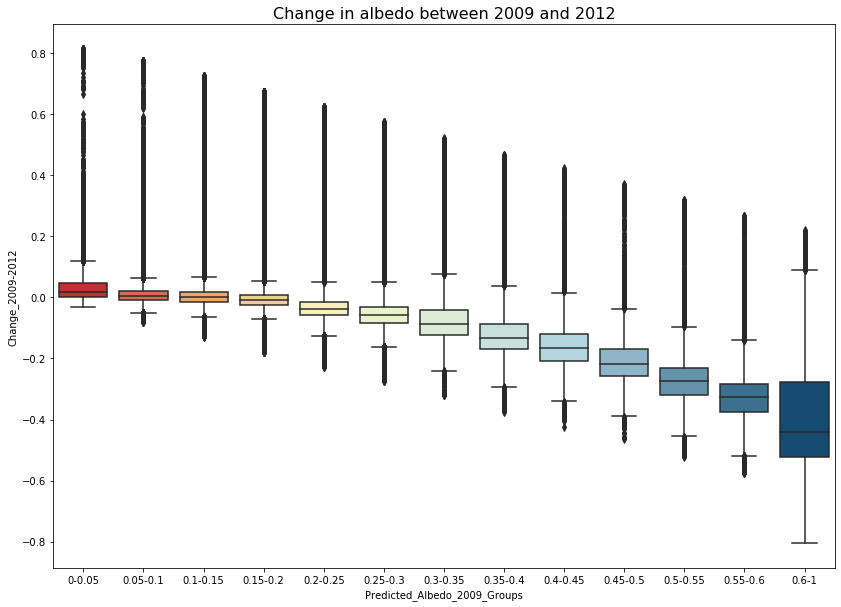

In [11]:
# sns.set_style("whitegrid") 
plt.figure(figsize=(14, 10))  
bplot = sns.boxplot(x = 'group', y = 'albedo_diff', data = combined_df,
                 palette=['#d7191c', '#e9603d','#fca75d', '#fed189','#fff8b6', '#eef8c8','#d9eed3', '#c3e4dd',
                         '#addae8', '#85b9d2','#5a96b8', '#2f729d','#054e83'],
                order=['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', '0.3-0.35', '0.35-0.4', '0.4-0.45', '0.45-0.5', 
                       '0.5-0.55', '0.55-0.6', '0.6-1'])


bplot.axes.set_title('Change in albedo between 2009 and 2012',
                    fontsize=16)
 
bplot.set_xlabel('Predicted_Albedo_2009_Groups', 
                fontsize=10)
 
bplot.set_ylabel('Change_2009-2012',
                fontsize=10)
 
bplot.tick_params(labelsize=10)

In [ ]:
### merging 2012 and 2014 prediction

In [ ]:
# spatial join
combined_df = gpd.sjoin(LA_2012, 
                         LA_2014, 
                         how="left", 
                         op='intersects')

combined_df

In [ ]:
joined_drop = combined_df.drop_duplicates(subset=['roof_no_left'], keep="last") 
joined_drop = joined_drop.drop_duplicates(subset=['roof_no_right'], keep="last") 
joined_drop = joined_drop.reset_index(drop=True)
joined_drop

In [14]:
combined_df = joined_drop

In [ ]:
combined_df['albedo_diff'] = combined_df['Scored Lab_right'] - combined_df['Scored Lab_left']
combined_df

In [ ]:

groups = []
for row in combined_df['Scored Lab_left']:
    if 0 <= row < 0.05:    groups.append('0-0.05')
    elif 0.05 <= row < 0.1:    groups.append('0.05-0.1')
    elif 0.1 <= row < 0.15:    groups.append('0.1-0.15')
    elif 0.15 <= row < 0.2:    groups.append('0.15-0.2')
    elif 0.2 <= row < 0.25:    groups.append('0.2-0.25')
    elif 0.25 <= row < 0.3:    groups.append('0.25-0.3')
    elif 0.3 <= row < 0.35:    groups.append('0.3-0.35')
    elif 0.35 <= row < 0.4:    groups.append('0.35-0.4')
    elif 0.4 <= row < 0.45:    groups.append('0.4-0.45')
    elif 0.45 <= row < 0.5:    groups.append('0.45-0.5')
    elif 0.5 <= row < 0.55:    groups.append('0.5-0.55')
    elif 0.55 <= row < 0.6:    groups.append('0.55-0.6')
    elif row >=0.6:    groups.append('0.6-1')
        
# Create a column from the list
combined_df['group'] = groups

combined_df

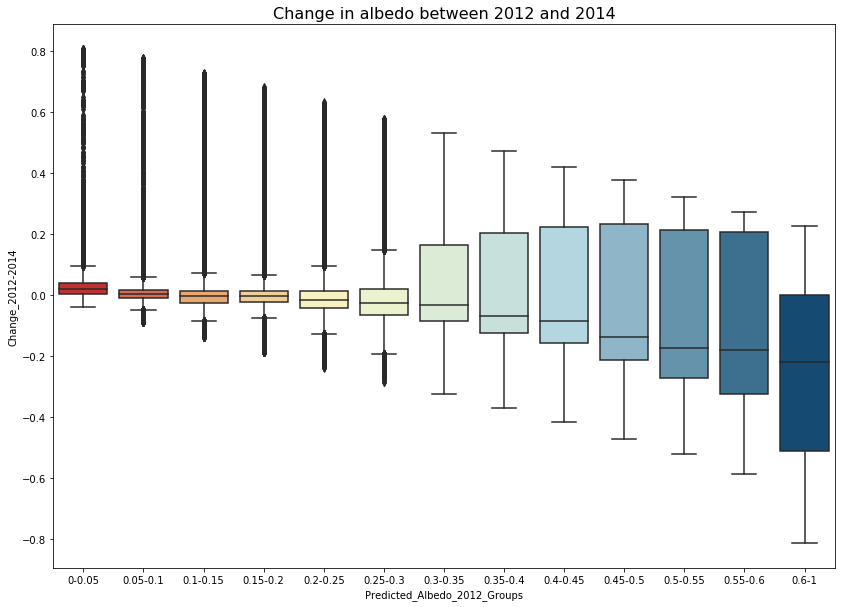

In [17]:
# sns.set_style("whitegrid") 
plt.figure(figsize=(14, 10))  
bplot = sns.boxplot(x = 'group', y = 'albedo_diff', data = combined_df,
                 palette=['#d7191c', '#e9603d','#fca75d', '#fed189','#fff8b6', '#eef8c8','#d9eed3', '#c3e4dd',
                         '#addae8', '#85b9d2','#5a96b8', '#2f729d','#054e83'],
                order=['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', '0.3-0.35', '0.35-0.4', '0.4-0.45', '0.45-0.5', 
                       '0.5-0.55', '0.55-0.6', '0.6-1'])


bplot.axes.set_title('Change in albedo between 2012 and 2014',
                    fontsize=16)
 
bplot.set_xlabel('Predicted_Albedo_2012_Groups', 
                fontsize=10)
 
bplot.set_ylabel('Change_2012-2014',
                fontsize=10)
 
bplot.tick_params(labelsize=10)

In [ ]:
### merging 2014 and 2016 prediction

In [ ]:
combined_df = pd.merge(LA_2014, LA_2016, on='roof_no', how='inner')
combined_df

In [ ]:
combined_df['albedo_diff'] = combined_df['Scored Lab_y'] - combined_df['Scored Lab_x']
combined_df

In [ ]:
groups = []
for row in combined_df['Scored Lab_x']:
    if 0 <= row < 0.05:    groups.append('0-0.05')
    elif 0.05 <= row < 0.1:    groups.append('0.05-0.1')
    elif 0.1 <= row < 0.15:    groups.append('0.1-0.15')
    elif 0.15 <= row < 0.2:    groups.append('0.15-0.2')
    elif 0.2 <= row < 0.25:    groups.append('0.2-0.25')
    elif 0.25 <= row < 0.3:    groups.append('0.25-0.3')
    elif 0.3 <= row < 0.35:    groups.append('0.3-0.35')
    elif 0.35 <= row < 0.4:    groups.append('0.35-0.4')
    elif 0.4 <= row < 0.45:    groups.append('0.4-0.45')
    elif 0.45 <= row < 0.5:    groups.append('0.45-0.5')
    elif 0.5 <= row < 0.55:    groups.append('0.5-0.55')
    elif 0.55 <= row < 0.6:    groups.append('0.55-0.6')
    elif row >=0.6:    groups.append('0.6-1')
        
# Create a column from the list
combined_df['group'] = groups

combined_df

# sns.set_style("whitegrid") 
plt.figure(figsize=(14, 10))  
bplot = sns.boxplot(x = 'group', y = 'albedo_diff', data = combined_df,
                 palette=['#d7191c', '#e9603d','#fca75d', '#fed189','#fff8b6', '#eef8c8','#d9eed3', '#c3e4dd',
                         '#addae8', '#85b9d2','#5a96b8', '#2f729d','#054e83'],
                order=['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', '0.3-0.35', '0.35-0.4', '0.4-0.45', '0.45-0.5', 
                       '0.5-0.55', '0.55-0.6', '0.6-1'])


bplot.axes.set_title('Change in albedo between 2014 and 2016',
                    fontsize=16)
 
bplot.set_xlabel('Predicted_Albedo_2014_Groups', 
                fontsize=10)
 
bplot.set_ylabel('Change_2014-2016',
                fontsize=10)
 
bplot.tick_params(labelsize=10)

In [ ]:
### merging 2016 and 2018 prediction

In [ ]:
combined_df = pd.merge(LA_2016, LA_2018, on='roof_no', how='inner')
combined_df

In [ ]:
combined_df['albedo_diff'] = combined_df['Scored Lab_y'] - combined_df['Scored Lab_x']
combined_df

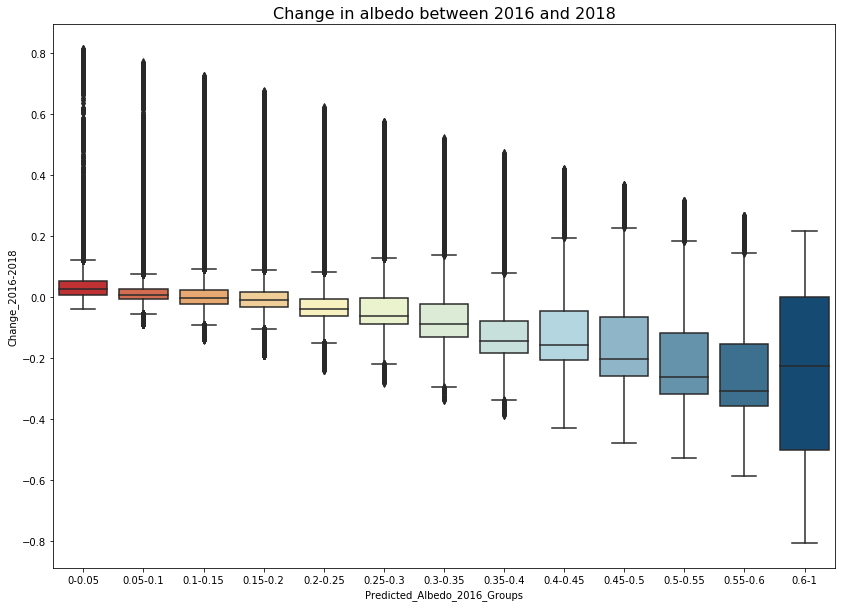

In [23]:
groups = []
for row in combined_df['Scored Lab_x']:
    if 0 <= row < 0.05:    groups.append('0-0.05')
    elif 0.05 <= row < 0.1:    groups.append('0.05-0.1')
    elif 0.1 <= row < 0.15:    groups.append('0.1-0.15')
    elif 0.15 <= row < 0.2:    groups.append('0.15-0.2')
    elif 0.2 <= row < 0.25:    groups.append('0.2-0.25')
    elif 0.25 <= row < 0.3:    groups.append('0.25-0.3')
    elif 0.3 <= row < 0.35:    groups.append('0.3-0.35')
    elif 0.35 <= row < 0.4:    groups.append('0.35-0.4')
    elif 0.4 <= row < 0.45:    groups.append('0.4-0.45')
    elif 0.45 <= row < 0.5:    groups.append('0.45-0.5')
    elif 0.5 <= row < 0.55:    groups.append('0.5-0.55')
    elif 0.55 <= row < 0.6:    groups.append('0.55-0.6')
    elif row >=0.6:    groups.append('0.6-1')
        
# Create a column from the list
combined_df['group'] = groups

combined_df

# sns.set_style("whitegrid") 
plt.figure(figsize=(14, 10))  
bplot = sns.boxplot(x = 'group', y = 'albedo_diff', data = combined_df,
                 palette=['#d7191c', '#e9603d','#fca75d', '#fed189','#fff8b6', '#eef8c8','#d9eed3', '#c3e4dd',
                         '#addae8', '#85b9d2','#5a96b8', '#2f729d','#054e83'],
                order=['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', '0.3-0.35', '0.35-0.4', '0.4-0.45', '0.45-0.5', 
                       '0.5-0.55', '0.55-0.6', '0.6-1'])


bplot.axes.set_title('Change in albedo between 2016 and 2018',
                    fontsize=16)
 
bplot.set_xlabel('Predicted_Albedo_2016_Groups', 
                fontsize=10)
 
bplot.set_ylabel('Change_2016-2018',
                fontsize=10)
 
bplot.tick_params(labelsize=10)

--------------------------------------